<a href="https://colab.research.google.com/github/anusree-k-r/Anusree-K-R-works/blob/main/Anusree_K_R_kf%26skf_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing and reading the dataset to python environment

In [4]:
data=pd.read_csv('titanic_dataset.csv')

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
### Filling the missing values present in  the numerical columns of the dataset

In [12]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [13]:
data['Age'].isna().sum()

0

In [14]:
### Filling the missing values present in all the categorical columns of the dataset

In [15]:
for i in ['Cabin','Embarked']:
  data[i]=data[i].fillna(data[i].mode()[0])

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [19]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [20]:
freqgraph=data.select_dtypes(include=['float','int'])

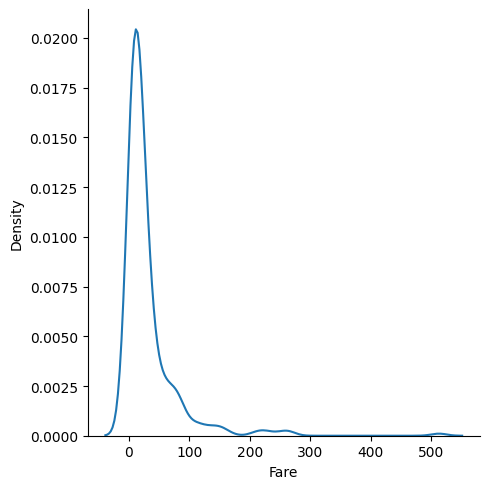

In [21]:
sns.displot(freqgraph, x = 'Fare', kind='kde')
plt.show()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

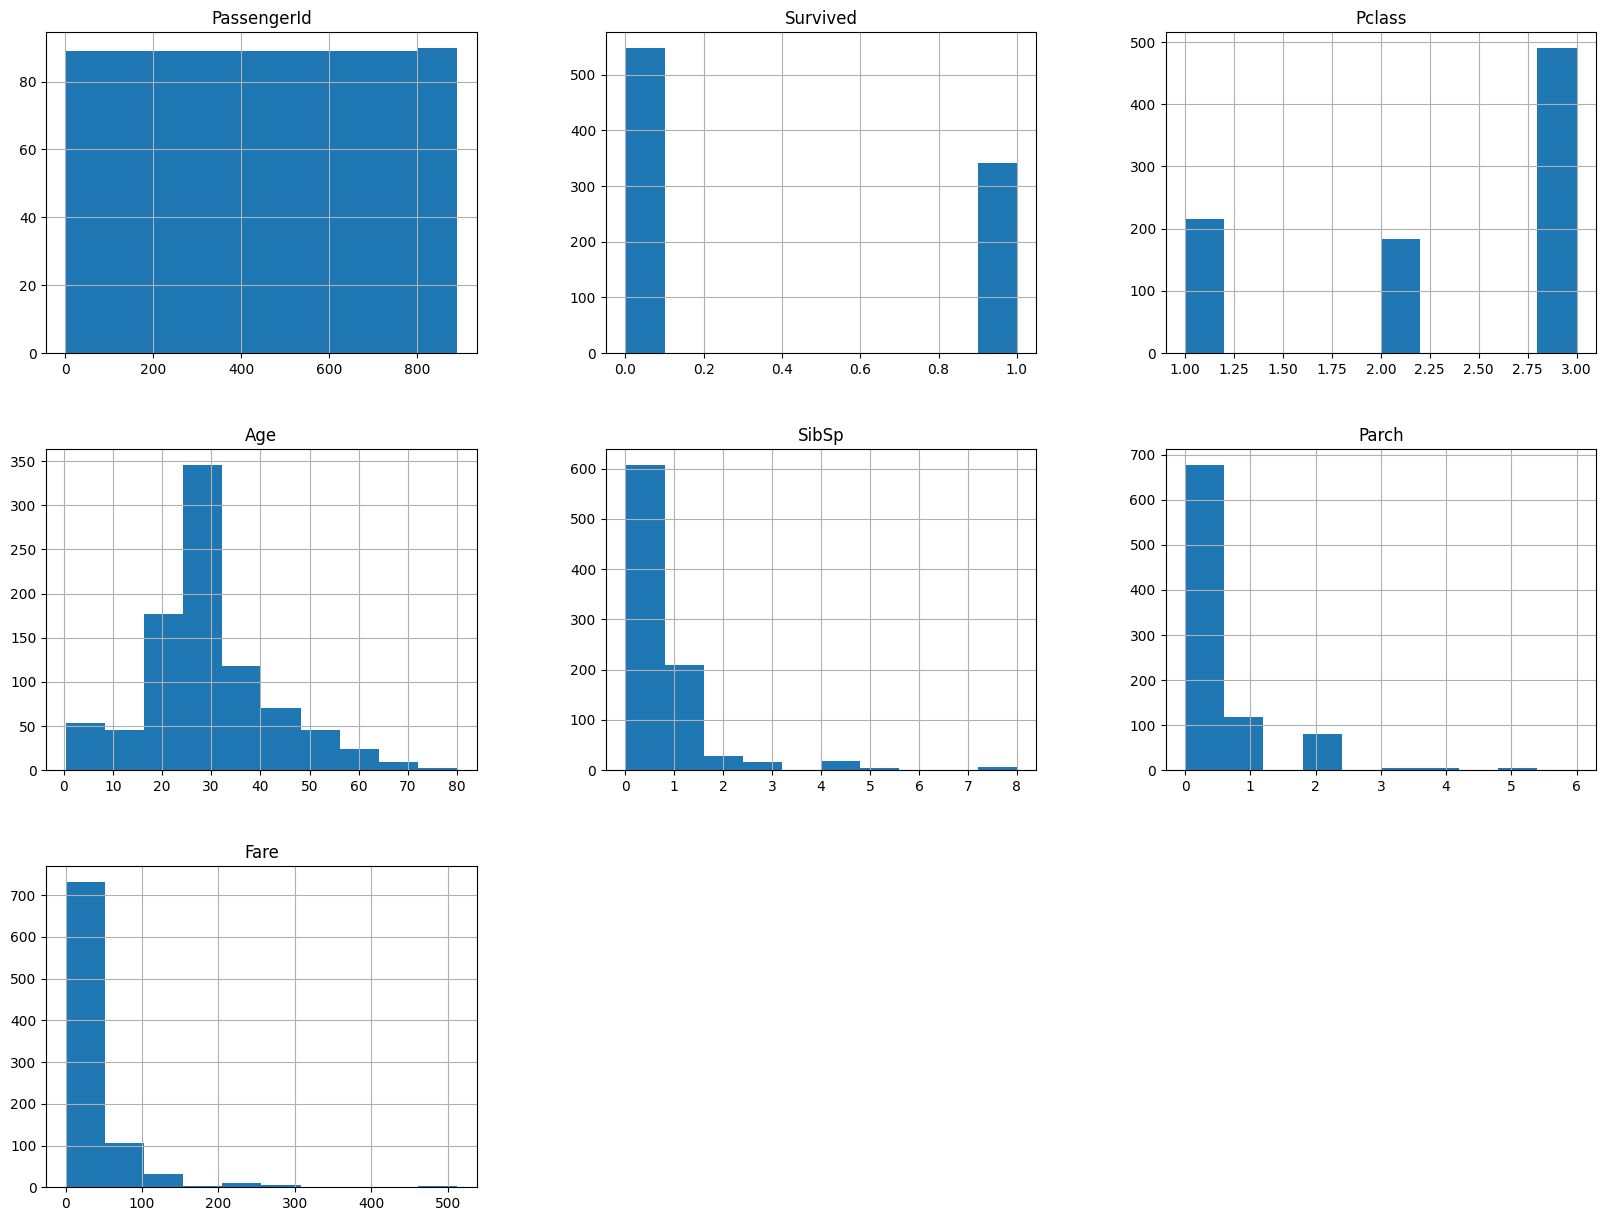

In [22]:
freqgraph.hist(figsize=(20,15))

In [23]:
### Combining SibSp and Parch as they both indicate co passengers
data['CoPass']= data['SibSp']+data['Parch']

In [24]:
### Dropping Passenger Id ,Name, SibSp and Parch columns
data.drop(['PassengerId','Name','SibSp','Parch'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,CoPass
0,0,3,male,22.0,A/5 21171,7.2500,B96 B98,S,1
1,1,1,female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,female,26.0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,1,1,female,35.0,113803,53.1000,C123,S,1
4,0,3,male,35.0,373450,8.0500,B96 B98,S,0


In [25]:
### Converting Categorical column 'Sex' to numerical
Gender={'male':0,'female':1}
data['Sex']=data['Sex'].map(Gender)
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,CoPass
0,0,3,0,22.0,A/5 21171,7.2500,B96 B98,S,1
1,1,1,1,38.0,PC 17599,71.2833,C85,C,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,1,1,1,35.0,113803,53.1000,C123,S,1
4,0,3,0,35.0,373450,8.0500,B96 B98,S,0


In [26]:
### preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
data['Sex']=le.fit_transform(data['Sex'])
data['Ticket']=le.fit_transform(data['Ticket'])
data['Cabin']=le.fit_transform(data['Cabin'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [29]:
data.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,CoPass
0,0,3,0,22.0,523,7.2500,47,2,1
1,1,1,1,38.0,596,71.2833,81,0,1
2,1,3,1,26.0,669,7.9250,47,2,0
3,1,1,1,35.0,49,53.1000,55,2,1
4,0,3,0,35.0,472,8.0500,47,2,0
5,0,3,0,28.0,275,8.4583,47,1,0
6,0,1,0,54.0,85,51.8625,129,2,0
7,0,3,0,2.0,395,21.0750,47,2,4
8,1,3,1,27.0,344,11.1333,47,2,2
9,1,2,1,14.0,132,30.0708,47,0,1


In [30]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'CoPass'],
      dtype='object')

In [31]:
y=data['Survived']
X=data.drop('Survived',axis=1)

In [32]:
### standard scaling the data set before model building
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
X=std_scl.fit_transform(X)

In [33]:
### converting the scaled array to dataframe
X=pd.DataFrame(X,columns=['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin','Embarked', 'CoPass'])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
###KNN model Classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [39]:
## finding different accuracies for k values
metric_k=[]
neighbors=range(3,18)

for k in neighbors:
    model1=KNeighborsClassifier(n_neighbors=k)
    model1=model1.fit(X_train,y_train)
    y_pred_knn=model1.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

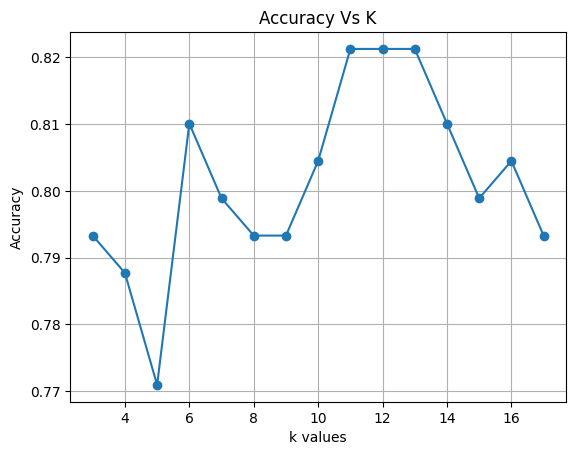

In [40]:
### plotting accuracy for different k values
plt.plot(neighbors,metric_k,'o-')
plt.title('Accuracy Vs K')
plt.xlabel('k values')
plt.ylabel('Accuracy');
plt.grid();

In [41]:
y_pred_knn

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [42]:
model1=KNeighborsClassifier(n_neighbors=6)
model1=model1.fit(X_train,y_train)
y_pred_knn_opt=model1.predict(X_test)

In [43]:
acc=accuracy_score(y_test,y_pred_knn_opt)

In [44]:
acc

0.8100558659217877

In [45]:
precision_score(y_test,y_pred_knn_opt)

0.8333333333333334

In [46]:
### Model building using SVM Classification

In [47]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')

In [48]:
svm_model=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [49]:
y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [50]:
### performance metrics calculation

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
confusion_matrix(y_test,y_pred_svm)
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

In [52]:
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]])

In [53]:
precision_score(y_test,y_pred_svm)

0.7536231884057971

In [55]:
# Comparing the results obtained,kNN model gives better accuracy score than SVM model
# accuracy score on SVM model =0.7821
# accuracy score on kNN model =0.8100

In [56]:
# Perform cross validation on both SVM and KNN models and comparing the results

In [57]:
### k-fold cross validation
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [58]:
for train_index,test_index in kfold_validator.split(X,y):
  print('Training index:',train_index)
  print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [59]:
### Stratified cross validation technique for SVM model

In [60]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)
for train_index,test_index in skfold_validator.split(X,y):
  print('Training index:',train_index)
  print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cv_result_skfold_svm=cross_val_score(svm_model,X,y,cv=skfold_validator)
np.mean(cv_result_skfold_svm)

0.786729088639201

In [63]:
### Cross validation score on KFold validation

In [64]:
cv_result_kfold_svm=cross_val_score(svm_model,X,y,cv=kfold_validator)
np.mean(cv_result_skfold_svm)

0.786729088639201

In [65]:
### stratified KFold for knn model

In [86]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)
for train_index,test_index in skfold_validator.split(X,y):
  print('Training index:',train_index)
  print('Testing index:',test_index)
cv_result_skfold=cross_val_score(model1,X,y,cv=skfold_validator)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [87]:
### Stratified kFold cross validation score for KNN model

In [88]:
knn_cvs=cv_result_skfold

In [89]:
knn_cvs

array([0.81111111, 0.78651685, 0.75280899, 0.86516854, 0.85393258,
       0.80898876, 0.79775281, 0.76404494, 0.82022472, 0.78651685])

In [90]:
np.mean(knn_cvs)

0.8047066167290886

In [91]:
### KFold cross validation for KNN model

In [95]:
from sklearn.model_selection import cross_val_score
cv_result_kfold=cross_val_score(model1,X,y,cv=kfold_validator)

In [96]:
cv_result_kfold

array([0.81111111, 0.78651685, 0.75280899, 0.86516854, 0.85393258,
       0.80898876, 0.79775281, 0.76404494, 0.82022472, 0.78651685])

In [97]:
np.mean(cv_result_kfold)

0.8047066167290886

In [98]:
#Cross validation score of SVM model using Kfold technique=0.7867
#Cross validation score of SVM model using SKfold technique=0.7867
#Cross validation score of kNN model using Kfold technique=0.8047
#Cross validation score of kNN model using SKfold technique=0.8047